<hr>
<center>
   <font size='4'> <B> Desafio: </B> BMD é uma empresa vende bermudas e está buscando aumentar suas vendas. Ela nos fornece uma base de dados e deseja saber o que pode fazer para melhorar nesse quesito. </font> <br>
    <br>
    <font size='3'> <I> <B> Análise feita por: </B> Yasmin de Miranda Nobre </I> </font> <br>
    <br>
    <font size='3'> <I> <B> Base de dados por: </B> Hasthag Programação </I> </font>
</center> 
<hr>


## 1) Importando bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime, timedelta

In [2]:
sns.set()

In [3]:
base = pd.read_excel("Vendas.xlsx")

## 2) Análise exploratória da base de dados (geral)

In [4]:
base.head() #visualizando as 5 primeiras observações da base de dados

,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,2019-12-01,Iguatemi Campinas,Bermuda Estampa,1,169,169
1,2019-12-01,Iguatemi Esplanada,Bermuda Xadrez,1,155,155
2,2019-12-01,Norte Shopping,Bermuda,2,150,300
3,2019-12-01,Iguatemi Campinas,Bermuda Listrado,3,163,489
4,2019-12-01,Iguatemi Campinas,Bermuda Linho,3,195,585


A fim de tornar a análise mais simples, iremos mudar os nomes das variáveis:

In [5]:
base.columns=['data',"id",'produto','qtd','v_u','v_f']
base.head()

,data,id,produto,qtd,v_u,v_f
0,2019-12-01,Iguatemi Campinas,Bermuda Estampa,1,169,169
1,2019-12-01,Iguatemi Esplanada,Bermuda Xadrez,1,155,155
2,2019-12-01,Norte Shopping,Bermuda,2,150,300
3,2019-12-01,Iguatemi Campinas,Bermuda Listrado,3,163,489
4,2019-12-01,Iguatemi Campinas,Bermuda Linho,3,195,585


Legenda da Base de Dados: <br>
1. <I> data </I>: Dia da venda <br>
   <br>
2. <I> id </I>: Identificação da loja onde ocorreu a venda <br>
    <br>
3. <I> produto </I>: Produto que foi vendido <br>
   <br>
4. <I> qtd </I>: Quantidade do produto que foi vendida <br>
    <br>
5. <I> v_u </I>: Valor unitário, em reais, do produto que está sendo vendido <br>
    <br>
6. <I> v_f </I>: Valor final (total), em reais, da venda. Considera a quantidade de produtos que foram vendidos e multiplica pelo seu valor unitário. Ao longo da análise pode ser referido como "valor da venda" <br>

### 2.1) Analisando lojas que estão presentes na base de dados

In [6]:
base['id'].unique() #quais lojas aparecem

array(['Iguatemi Campinas', 'Iguatemi Esplanada', 'Norte Shopping',
       'Bourbon Shopping SP', 'Center Shopping Uberlândia'], dtype=object)

In [7]:
base['id'].value_counts(sort=False) #quantidade de vezes que loja foi observada

Iguatemi Campinas             16
Iguatemi Esplanada             8
Norte Shopping                11
Bourbon Shopping SP           13
Center Shopping Uberlândia     9
Name: id, dtype: int64

Iremos fazer uma análise mais detalhada da base de dados, por loja, na seção 3. Por ora, cabe essa noção de quais lojas aparecem e com que frequência

### 2.2) Analisando valor acumulado das vendas (valor final)

C:\Users\yasmi\anaconda3\envs\r_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


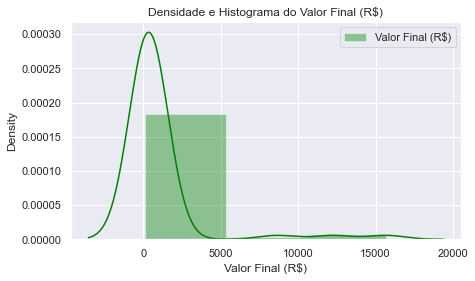

In [9]:
plt.figure(figsize=(7, 4))
sns.distplot(base['v_f'], bins=3, 
             axlabel="Valor Final (R\$)", 
             color="green",
             label = "Valor Final (R\$)")

plt.title("Densidade e Histograma do Valor Final (R\$)")
plt.legend()

In [10]:
base['v_f'].describe() 

count       57.000000
mean       980.614035
std       2757.203926
min        150.000000
25%        163.000000
50%        310.000000
75%        600.000000
max      15700.000000
Name: v_f, dtype: float64

<B> Comentários </B>: <br>
<br>    
A partir do comando 'describe' notamos que 57 vendas foram observadas. Nesse conjunto de dados notamos que um cliente aleatório inviste em média $R\$980$ reais na BMD.

Entretanto, como notamos no histograma apresentado e nas medidas 'std' (desvio padrão), 'min' (mínimo) e 'max' (máximo), existe uma grande variação no valor final de uma venda: Houveram clientes cujas compras somaram valores relativamente baixos, como $R\$150$, e outros cujo investimento total foi de quase $R\$16.000$. 

Entretanto, a maior parte dos clientes tendem a gastar "pouco", ou seja, até 5 mil reais na empresa. Percebemos pelo gráfico que em poucas vezes o valor final foi maior que este número. 

## 2.3) Analisando pelo período em que ocorreram as vendas

In [11]:
base['data'].describe()

<ipython-input-11-0413363f52c3>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  base['data'].describe()


count                      57
unique                     24
top       2019-12-01 00:00:00
freq                        5
first     2019-12-01 00:00:00
last      2019-12-26 00:00:00
Name: data, dtype: object

Como as datas estão no tipo "aaaa-mm-dd" e sabemos que todas as vendas ocorreram em dezembro de 2019, a analise será feita com a distinção dos dias do mês e dias da semana. Assim:

In [12]:
v_data = list()
for i in range(len(base)):
    v_data.append(base['data'][i].strftime("%d"))
    i = i+1

In [13]:
#quantidade por data

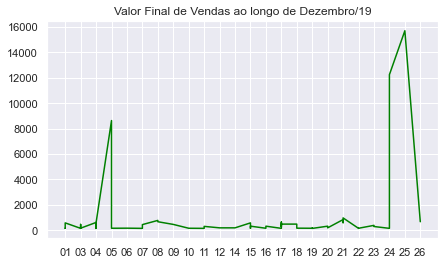

In [14]:
plt.figure(figsize=(7, 4))
plt.plot(v_data,base['v_f'], color="green")
plt.title("Valor Final de Vendas ao longo de Dezembro/19")
plt.show()

<B> Comentários </B>: <br>
<br>    
É possível perceber que o maior valor final das vendas (quantidade de produtos * valor unitário do produto) ocorreu no dias 25, sendo maior que $R\$14.000$. Como nesse dia comemoramos o Natal e muitas pessoas compram seu presente na "última hora", faz sentido o aumento exponencial deste indicador.

É importante observar, entretanto, que durante a maior parte do tempo, ou seja, entre os dias 05 e 23, o valor final das vendas foi constantemente baixo: abaixo de $R\$2.000$.

No gráfico abaixo vemos que a quantidade de produtos vendidos no dia teve comportamento identico ao do valor final das vendas. Essa situação faz sentido, visto que o valor final das vendas aumenta conforme a quantidade de produtos vendidos aumenta. Com

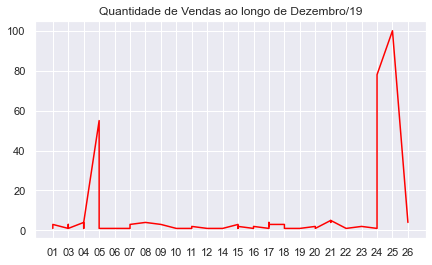

In [15]:
plt.figure(figsize=(7, 4))
plt.plot(v_data,base['qtd'], color="red")
plt.title("Quantidade de Vendas ao longo de Dezembro/19")
plt.show()

<B> Comentários </B>: <br>
<br>    
No gráfico acima vemos que a quantidade de produtos vendidos no dia teve comportamento identico ao do valor final das vendas. Essa situação faz sentido, visto que o valor final das vendas aumenta conforme a quantidade de produtos vendidos aumenta. Notamos essa relação no gráfico de dispersão abaixo, o qual, por sua vez, sugere que o valor final da venda pode ser modelado por meio de uma regressão linear simples (que parta da origem) em função da quantidade de vendas.

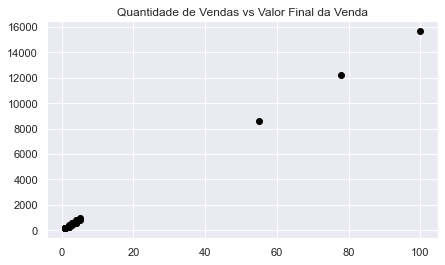

In [16]:
plt.figure(figsize=(7, 4))
plt.scatter(base['qtd'],base['v_f'], color="black")
plt.title("Quantidade de Vendas vs Valor Final da Venda")
plt.show()

In [17]:
v_dias = list()
for i in range(len(base)):
    v_dias.append(base['data'][i].strftime("%A"))
    i = i+1

In [18]:
v_dias

['Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Friday',
 'Saturday',
 'Saturday',
 'Sunday',
 'Sunday',
 'Monday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Saturday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Monday',
 'Monday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Wednesday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Thursday',
 'Friday',
 'Friday',
 'Saturday',
 'Saturday',
 'Saturday',
 'Sunday',
 'Sunday',
 'Monday',
 'Monday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Tuesday',
 'Wednesday',
 'Thursday']

In [19]:
v_dias = ['Domingo',
  'Domingo',
  'Domingo',
  'Domingo',
  'Domingo',
  'Terça-feira',
  'Terça-feira',
  'Terça-feira',
  'Terça-feira',
  'Quarta-feira',
  'Quarta-feira',
  'Quarta-feira',
  'Quarta-feira',
  'Quinta-feira',
  'Quinta-feira',
  'Quinta-feira',
  'Sexta-feira',
  'Sábado',
  'Sábado',
  'Domingo',
  'Domingo',
  'Segunda-feira',
  'Terça-feira',
  'Quarta-feira',
  'Quarta-feira',
  'Quinta-feira',
  'Sábado',
  'Domingo',
  'Domingo',
  'Domingo',
  'Segunda-feira',
  'Segunda-feira',
  'Terça-feira',
  'Terça-feira',
  'Terça-feira',
  'Terça-feira',
  'Quarta-feira',
  'Quarta-feira',
  'Quinta-feira',
  'Quinta-feira',
  'Quinta-feira',
  'Quinta-feira',
  'Sexta-feira',
  'Sexta-feira',
  'Sábado',
  'Sábado',
  'Sábado',
  'Domingo',
  'Domingo',
  'Segunda-feira',
  'Segunda-feira',
  'Terça-feira',
  'Terça-feira',
  'Terça-feira',
  'Terça-feira',
  'Quarta-feira',
  'Quinta-feira']

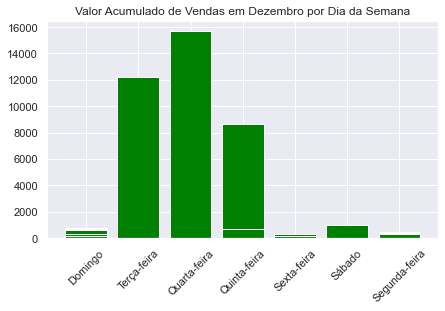

In [20]:
plt.figure(figsize=(7, 4))
plt.bar(v_dias,base['v_f'], color="green")
plt.title("Valor Acumulado de Vendas em Dezembro por Dia da Semana")
plt.xticks(rotation=45)
plt.show()

<B> Comentários </B>: <br>
<br>    
No gráfico acima notamos que o dia da semana em que houve maior valor acumulado de vendas foi na Quarta-Feira, o dia do Natal daquele ano, seguido da Terça-Feira. Curiosamente, o dia que arrecadou o menor valor foi na Sexta, com menos de $R\$2.000$ vendidos ao longo do mês. Visualmente, há indicios de que na sexta ocorre a venda final média, cujo investimento é de $R\$950$.

Diante disso os gerentes das lojas poderiam considerar campanhas específicas para aumentar o valor acumulado das vendas durante todo o mês e entre a Sexta-Feira e Segunda-Feira. Além disso, vemos que há maior necessidade de atendimento ao cliente entre Terça-Feira e Quinta-Feira e no dia do Natal. Essas informações podem auxiliar na alocação de seus devidos funcionários.

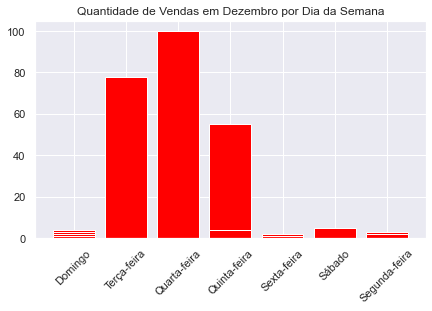

In [21]:
plt.figure(figsize=(7, 4))
plt.bar(v_dias,base['qtd'], color="red")
plt.title("Quantidade de Vendas em Dezembro por Dia da Semana")
plt.xticks(rotation=45)
plt.show()

### 2.4) Quanto à quantidade de vendas

Text(0.5, 1.0, 'Boxplot da Quantidade de Produtos Vendidos')

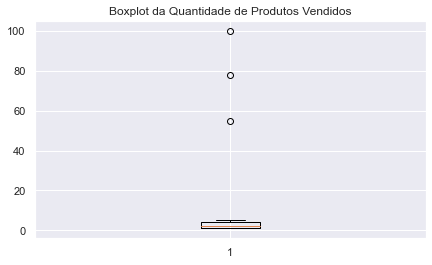

In [22]:
plt.figure(figsize=(7, 4))
plt.boxplot(base['qtd'])
plt.title("Boxplot da Quantidade de Produtos Vendidos")

É possivel notar 3 observações cuja quantidade de produtos vendidos foi bem acima do comum, configurando como quantidades atípicas (55,78 e 100 bermudas). Esses clientes puxaram a média de quantidade de produtos vendidos pra cima e com certeza também influenciaram o valor final das vendas, investigado inicialmente.

Abaixo vemos medidas descritivas dessa variável, bem como a frequência de cada quantidade de produtos vendidos. Aproximadamente 60% das pessoas que compram em BMD adquirem poucos produtos: até 2 bermudas.

In [23]:
round(base['qtd'].describe(),2)

count     57.00
mean       6.14
std       17.58
min        1.00
25%        1.00
50%        2.00
75%        4.00
max      100.00
Name: qtd, dtype: float64

In [24]:
freq_qtd = base['qtd'].value_counts()
freq_qtd

1      25
4      10
2       9
3       8
5       2
55      1
78      1
100     1
Name: qtd, dtype: int64

### 2.3) Quanto aos produtos

In [25]:
b_est = base[base['produto']=='Bermuda Estampa']

b_x = base[base['produto']=='Bermuda Xadrez']

b = base[base['produto']=='Bermuda']

b_listr =base[base['produto']=='Bermuda Listrado']

b_linho = base[base['produto']=='Bermuda Linho']

b_liso =base[base['produto']=='Bermuda Liso']

In [26]:
prod = ['Estampa','Xadrez','Basico', 'Listrado','Linho','Liso']

quant_prod=[sum(b_est['qtd']),  sum(b_x['qtd']),
            sum(b['qtd']), sum(b_listr['qtd']),
            sum(b_linho['qtd']), sum(b_liso['qtd'])]


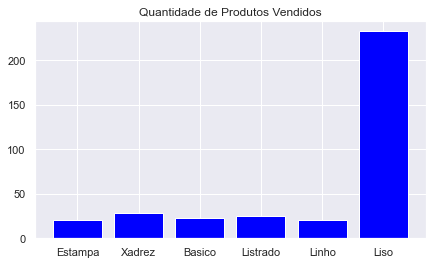

In [27]:
plt.figure(figsize=(7, 4))
plt.bar(prod,quant_prod, color="blue")
plt.title("Quantidade de Produtos Vendidos")
plt.show()

In [28]:
quant_prod

[21, 28, 23, 25, 20, 233]

In [29]:
valor_uni=[(b_est['v_u'][0]),(b_x['v_u'][1]),
            (b['v_u'][2]), (b_listr['v_u'][3]),
            (b_linho['v_u'][4]), (b_liso['v_u'][13])]
valor_uni


[169, 155, 150, 163, 195, 157]

Podemos ver pelo gráfico acima que a bermuda do tipo 'Liso' é a mais popular entre os consumidores, tendo sido vendida mais de 200 vezes no mês, mais de 4 vezes o que as demais venderam.

Sugere-se realizar uma pesquisa com os consumidores antes de estocar as bermudas a fim de entender melhor os gostos dos clientes. Vendo os dados, algo que pode ser feito para a empresa não se prejudicar é realizar promoções, a fim de esvaziar o estoque das bermudas que estão saindo pouco. 

Outra coisa que poderia explicar o destaque da bermuda lisa é o valor, porém, como visto na célula acima, a peça mais barata é a 'Basico' (apenas 'Bermuda' na base de dados), e seu valor é similar ao da 'Liso'. Ou seja, não é como se a quantidade de vendas do tipo 'Liso' se destacasse apenas porque ela é a mais acessível.

### 3) Analise por loja

Anteriormente tinhamos mostrado a frequência das lojas observadas na base de dados, mas podemos perceber essa informação de uma maneira melhor, por meio do seguinte gráfico:

In [30]:
freq_L = base['id'].value_counts(sort=False)
freq_lojas = list()
for i in range(len(freq_L)):
    freq_lojas.append(freq_L[i])
    i = i+1

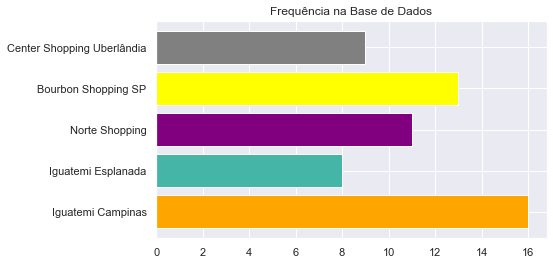

In [31]:
plt.figure(figsize=(7, 4))
plt.barh(base['id'].unique(),freq_lojas,color=["orange","#45b5a8","purple","yellow","gray"])
plt.title("Frequência na Base de Dados")
plt.show()

A fim de facilitar a anlise, iremos dividir a base de dados da seguinte maneira: 

In [32]:
campinas = base[base['id']=='Iguatemi Campinas']

esplanada = base[base['id']=='Iguatemi Esplanada']

norte = base[base['id']=='Norte Shopping']

bourbon = base[base['id']=='Bourbon Shopping SP']

center = base[base['id']=='Center Shopping Uberlândia']

In [33]:
quant_lojas=[sum(campinas['qtd']),  sum(esplanada['qtd']),
            sum(norte['qtd']), sum(bourbon['qtd']),
            sum(center['qtd'])] #vetor da quantidade total de produtos vendidos, por loja

vf_lojas=[sum(campinas['v_f']),  sum(esplanada['v_f']),
            sum(norte['v_f']), sum(bourbon['v_f']),
            sum(center['v_f'])] #vetor do valor final obtido por cada loja

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


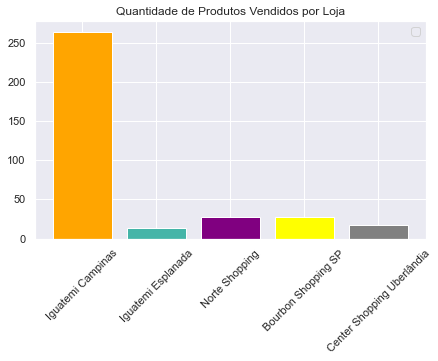

In [34]:
plt.figure(figsize=(7, 4))
plt.bar(base['id'].unique(), quant_lojas, color=["orange","#45b5a8","purple","yellow","gray"])
plt.title("Quantidade de Produtos Vendidos por Loja")
plt.xticks(rotation=45)
plt.legend()

In [35]:
quant_lojas

[264, 14, 27, 27, 18]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


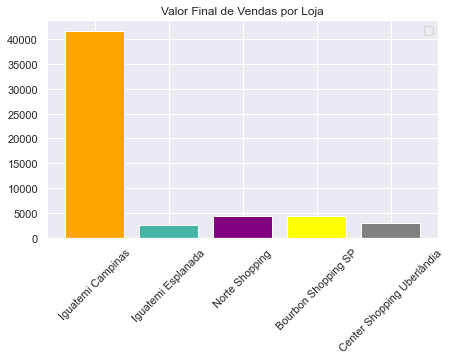

In [36]:
plt.figure(figsize=(7, 4))
plt.bar(base['id'].unique(), vf_lojas, color=["orange","#45b5a8","purple","yellow","gray"])
plt.title("Valor Final de Vendas por Loja")
plt.xticks(rotation=45)
plt.legend()

In [37]:
vf_lojas

[41720, 2473, 4322, 4386, 2994]

<B> Comentários </B>: <br>
<br>    
Notamos que a loja presente em 'Iguatemi Esplanada' é a que menos aparece na base de dados. Desse modo, esperavamos que essa seria a filial que menos vendeu produtos e que acumulou menos dinheiro ao fim do período observado. Do mesmo modo, como "Iguatemi Campinas" possui maior frequência nas observações, ela teria maior impacto nas medidas que estamos investigando.

Com os gráficos do Valor Final de vendas que cada loja acumulou vemos que "Iguatemi Campinas" de fato possui maior participação na geração de receita de BMD, enquanto a participação das demais são similares. Entretanto, ela vende mais do que 5x a mais que as outras lojas. 

Embora "Iguatemi Campinas" tenha sido considerada 16 vezes em nossa amostra, as outras lojas foram entre 8 e 13 vezes, ou seja, esse valor não é tão diferente a ponto de justificar um valor final de vendas acumulado tão baixo para as demais lojas ou tão expressivo para "Iguatemi Campinas". Ademais, o preço dos produtos são os mesmos nas diferentes filiais. 

Recomenda-se análise mais profunda de outras características das filiais para entender o motivo de "Iguatemi Campinas" se destacar.

In [38]:
#média de quqntidade vendida por loja

#media de valor final por loja

#tipo de bermuda vendido por loja

#por periodo